# K-Nearest Neighbors (KNN) Classifier on Customer Churn Dataset

*This notebook demonstrates the use of the K-Nearest Neighbors (KNN) algorithm to predict customer churn using a real-world telecom dataset.*

The notebook includes the following steps:
- Data preprocessing  
- Categorical encoding and feature scaling  
- Model training  
- Model evaluation  
- Hyperparameter tuning with the Elbow Method  

*Dataset source: [IBM-Machine-Learning GitHub Repository](https://github.com/KonuTech/IBM-Machine-Learning)*

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style='whitegrid')

In [2]:
# 2. Load the churn dataset (pkl format)
df = pd.read_pickle(
    filepath_or_buffer='data/churndata.pkl'
)

# Display first few rows
df.head()

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793


In [3]:
# 3. Target variable is 'churn_value' (binary: 1 = churned, 0 = stayed)
# Check class distribution
df['churn_value'].value_counts()

churn_value
0    5174
1    1869
Name: count, dtype: int64

In [4]:
# 4. Drop identifier and irrelevant columns (e.g. 'id', 'phone')
columns_to_drop = ['id', 'phone']
df = df.drop(columns=columns_to_drop, errors='ignore')


In [5]:
df.describe(include='object')

,offer,multiple,internet_type,security,backup,protection,support,unlimited,contract,paperless,payment
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,6,2,4,2,2,2,2,2,3,2,3
top,None,No,Fiber Optic,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,3877,4072,3035,5024,4614,4621,4999,4745,3610,4171,3909


In [6]:
# 5. One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Verify encoding
print('Encoded shape:', df_encoded.shape)


Encoded shape: (7043, 27)


In [7]:
# 6. Define features and target
X = df_encoded.drop('churn_value', axis=1)
y = df_encoded['churn_value']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [8]:
# 7. Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# 8. Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)


In [10]:
# 9. Evaluate model performance
print(f'Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(f'\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[1214   49]
 [  75  423]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1263
           1       0.90      0.85      0.87       498

    accuracy                           0.93      1761
   macro avg       0.92      0.91      0.91      1761
weighted avg       0.93      0.93      0.93      1761



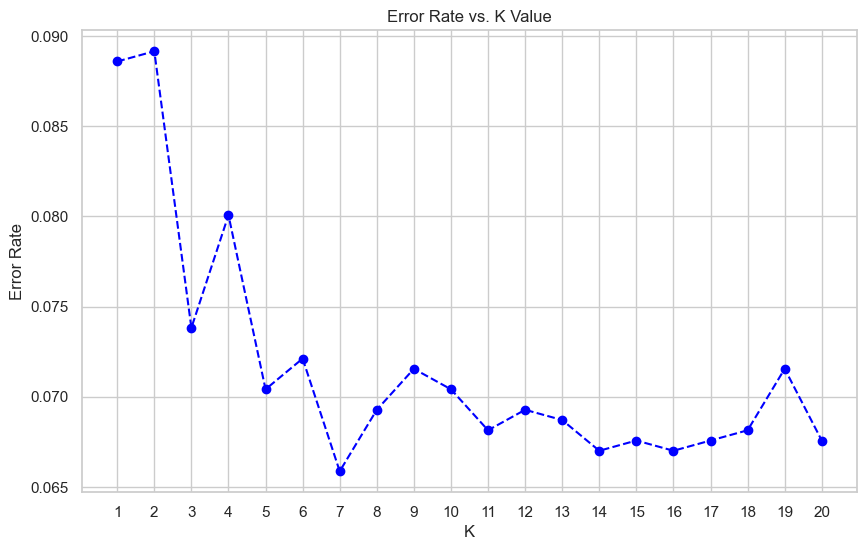

In [11]:
# 10. Tune the number of neighbors (k) using the elbow method
error_rate = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    error_rate.append(np.mean(preds != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
